In [26]:
import os
import dask
import dask.dataframe as dd
import pandas as pd
import numpy as np

from dask.diagnostics import ProgressBar

In [2]:
df = dd.read_parquet("nyc_final")

In [3]:
df2 = dask.datasets.timeseries()
df2.head()

,name,id,x,y
timestamp,,,,
2000-01-01 00:00:00,Oliver,1010,-0.390697,0.743034
2000-01-01 00:00:01,Charlie,1020,0.235837,-0.683228
2000-01-01 00:00:02,Yvonne,1028,0.930857,0.285661
2000-01-01 00:00:03,Ursula,1016,0.202519,0.321938
2000-01-01 00:00:04,George,977,0.409830,0.401705


In [4]:
df3 = dd.read_csv("train.csv")

In [5]:
with ProgressBar():
    display(df3.head())

[########################################] | 100% Completed | 913.16 ms


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
with ProgressBar():
    df3 \
        .set_index("ID_code") \
        .repartition(npartitions=os.cpu_count()) \
        .to_parquet("train")

[########################################] | 100% Completed | 2.76 ss
[########################################] | 100% Completed | 4.96 ss


In [7]:
df4 = dd.read_parquet("train")

In [8]:
with ProgressBar():
    display(df4.head())

[########################################] | 100% Completed | 313.24 ms


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_10,0,5.0702,-0.5447,9.5900,4.2987,12.3910,-18.8687,6.0382,14.3797,-0.4711,...,7.2780,8.0819,0.2139,-0.0761,14.9585,-1.2160,6.6576,9.2553,14.2914,-7.6652
train_100,0,9.4702,-4.0205,9.3693,9.4134,9.8362,-16.4643,6.0796,17.8444,-0.4833,...,2.7162,6.3275,3.8694,7.0642,21.1426,-0.6775,6.5296,7.7402,12.1681,-6.8294
train_1000,0,8.5826,-8.3369,10.1053,10.2773,12.3695,-0.5861,4.6452,21.4091,-4.7384,...,2.0163,9.2570,0.9863,3.7194,13.8578,0.8077,10.1349,9.7018,17.7495,-9.2302


In [19]:
with ProgressBar():
    condition = df4["var_0"] > 0
    
    std_plan = df4[condition] \
        .groupby("target")["var_1"] \
        .std()
    
    std = std_plan.compute()

std

[########################################] | 100% Completed | 371.65 ms


target
0    4.024813
1    4.220638
Name: var_1, dtype: float64

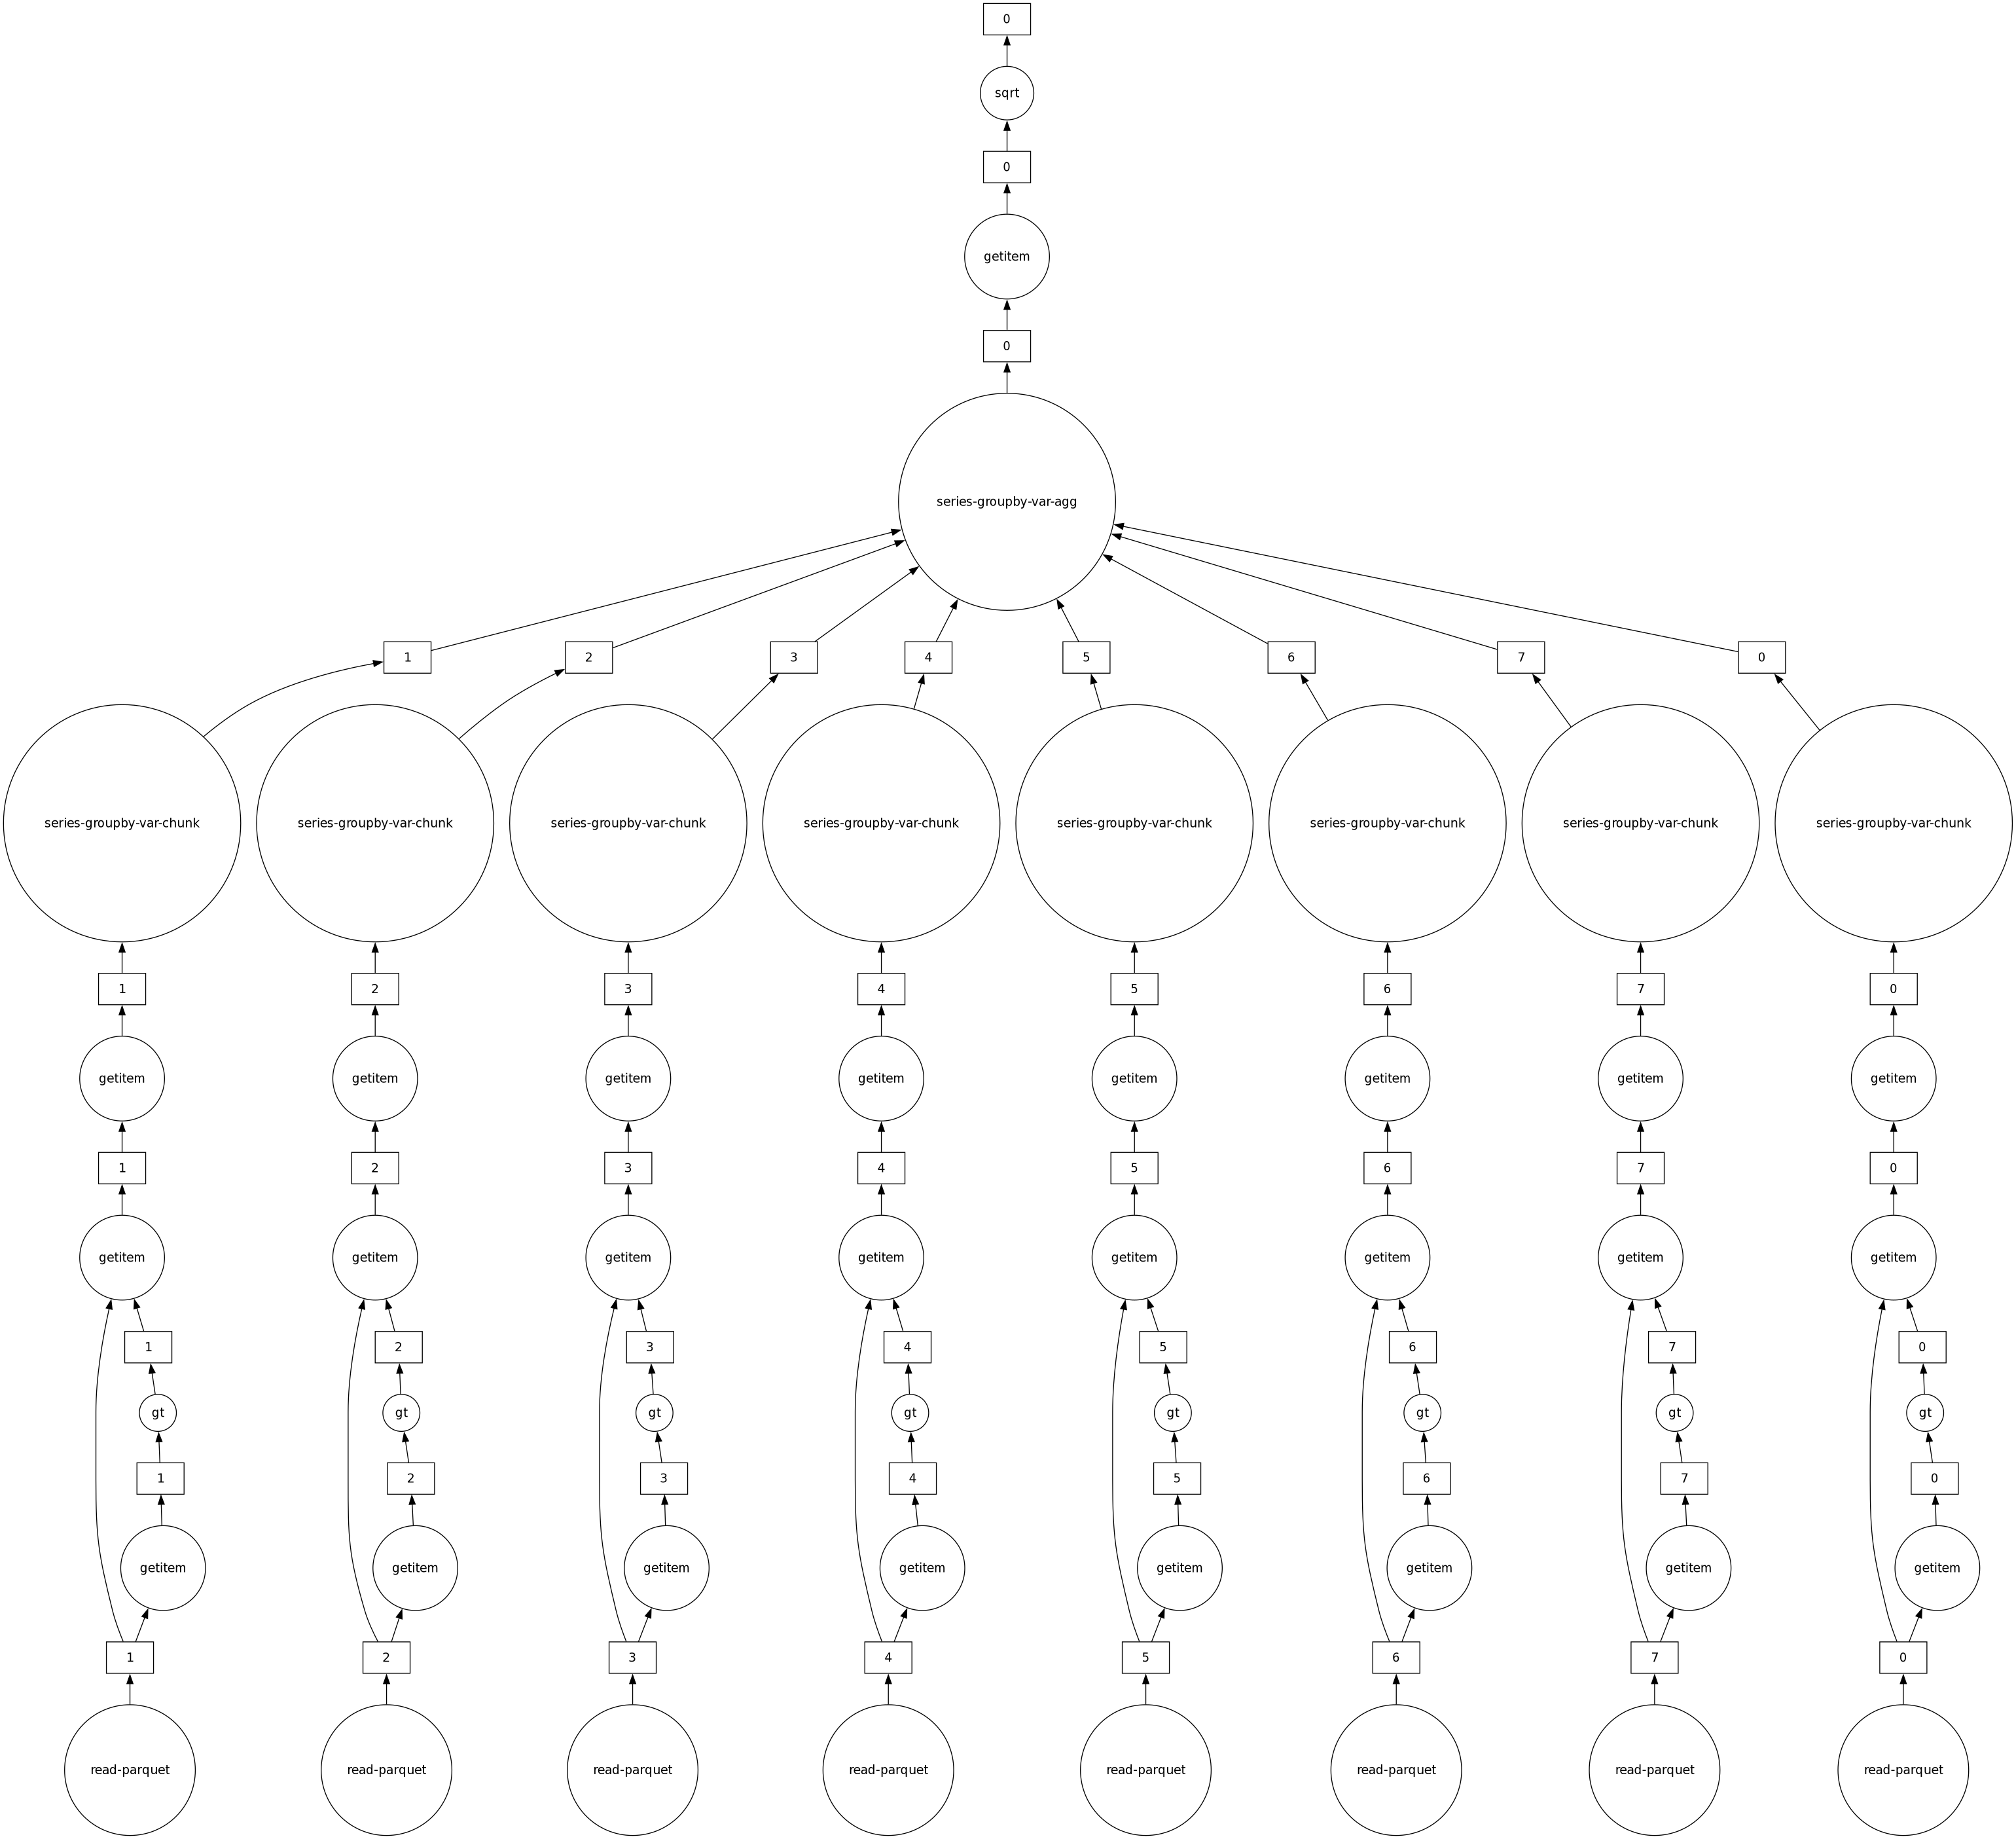

In [20]:
std_plan.visualize()

[########################################] | 100% Completed | 225.88 ms


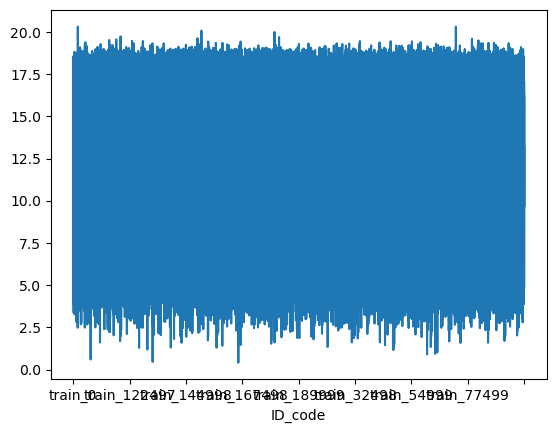

In [24]:
with ProgressBar():
    df4["var_0"].compute().plot()

In [27]:
s1 = pd.Series(np.random.randn(5))

In [46]:
ddf = dd.from_pandas(s1, npartitions=os.cpu_count())

In [44]:
with ProgressBar():
    display(ddf.mean().compute())

[########################################] | 100% Completed | 104.36 ms


0.45459696236660124

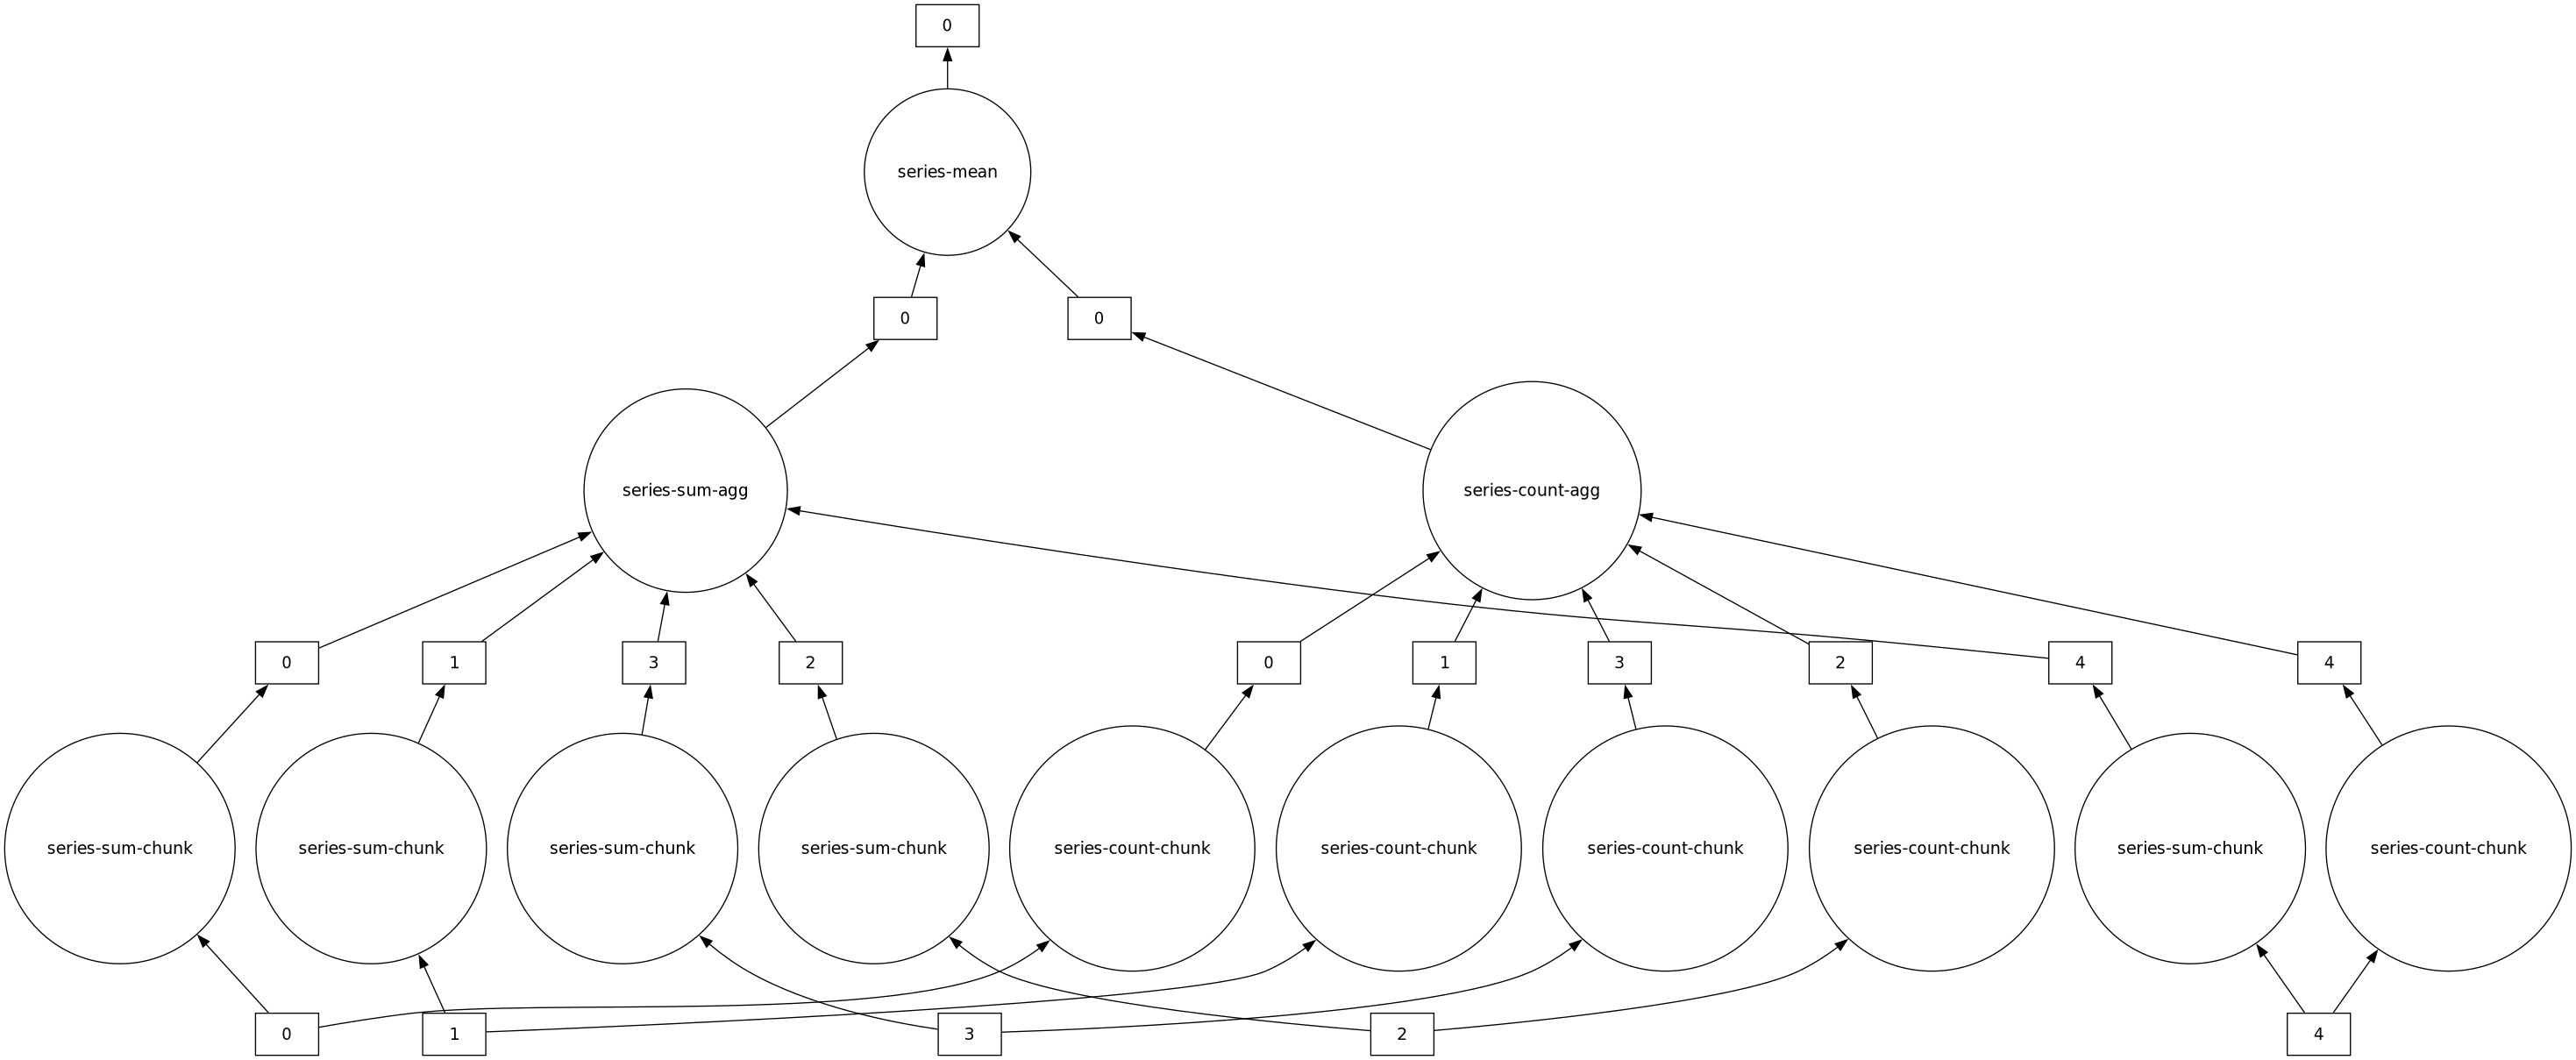

In [41]:
ddf.mean().visualize()

In [45]:
with ProgressBar():
    ddf.std().compute()

[########################################] | 100% Completed | 103.65 ms


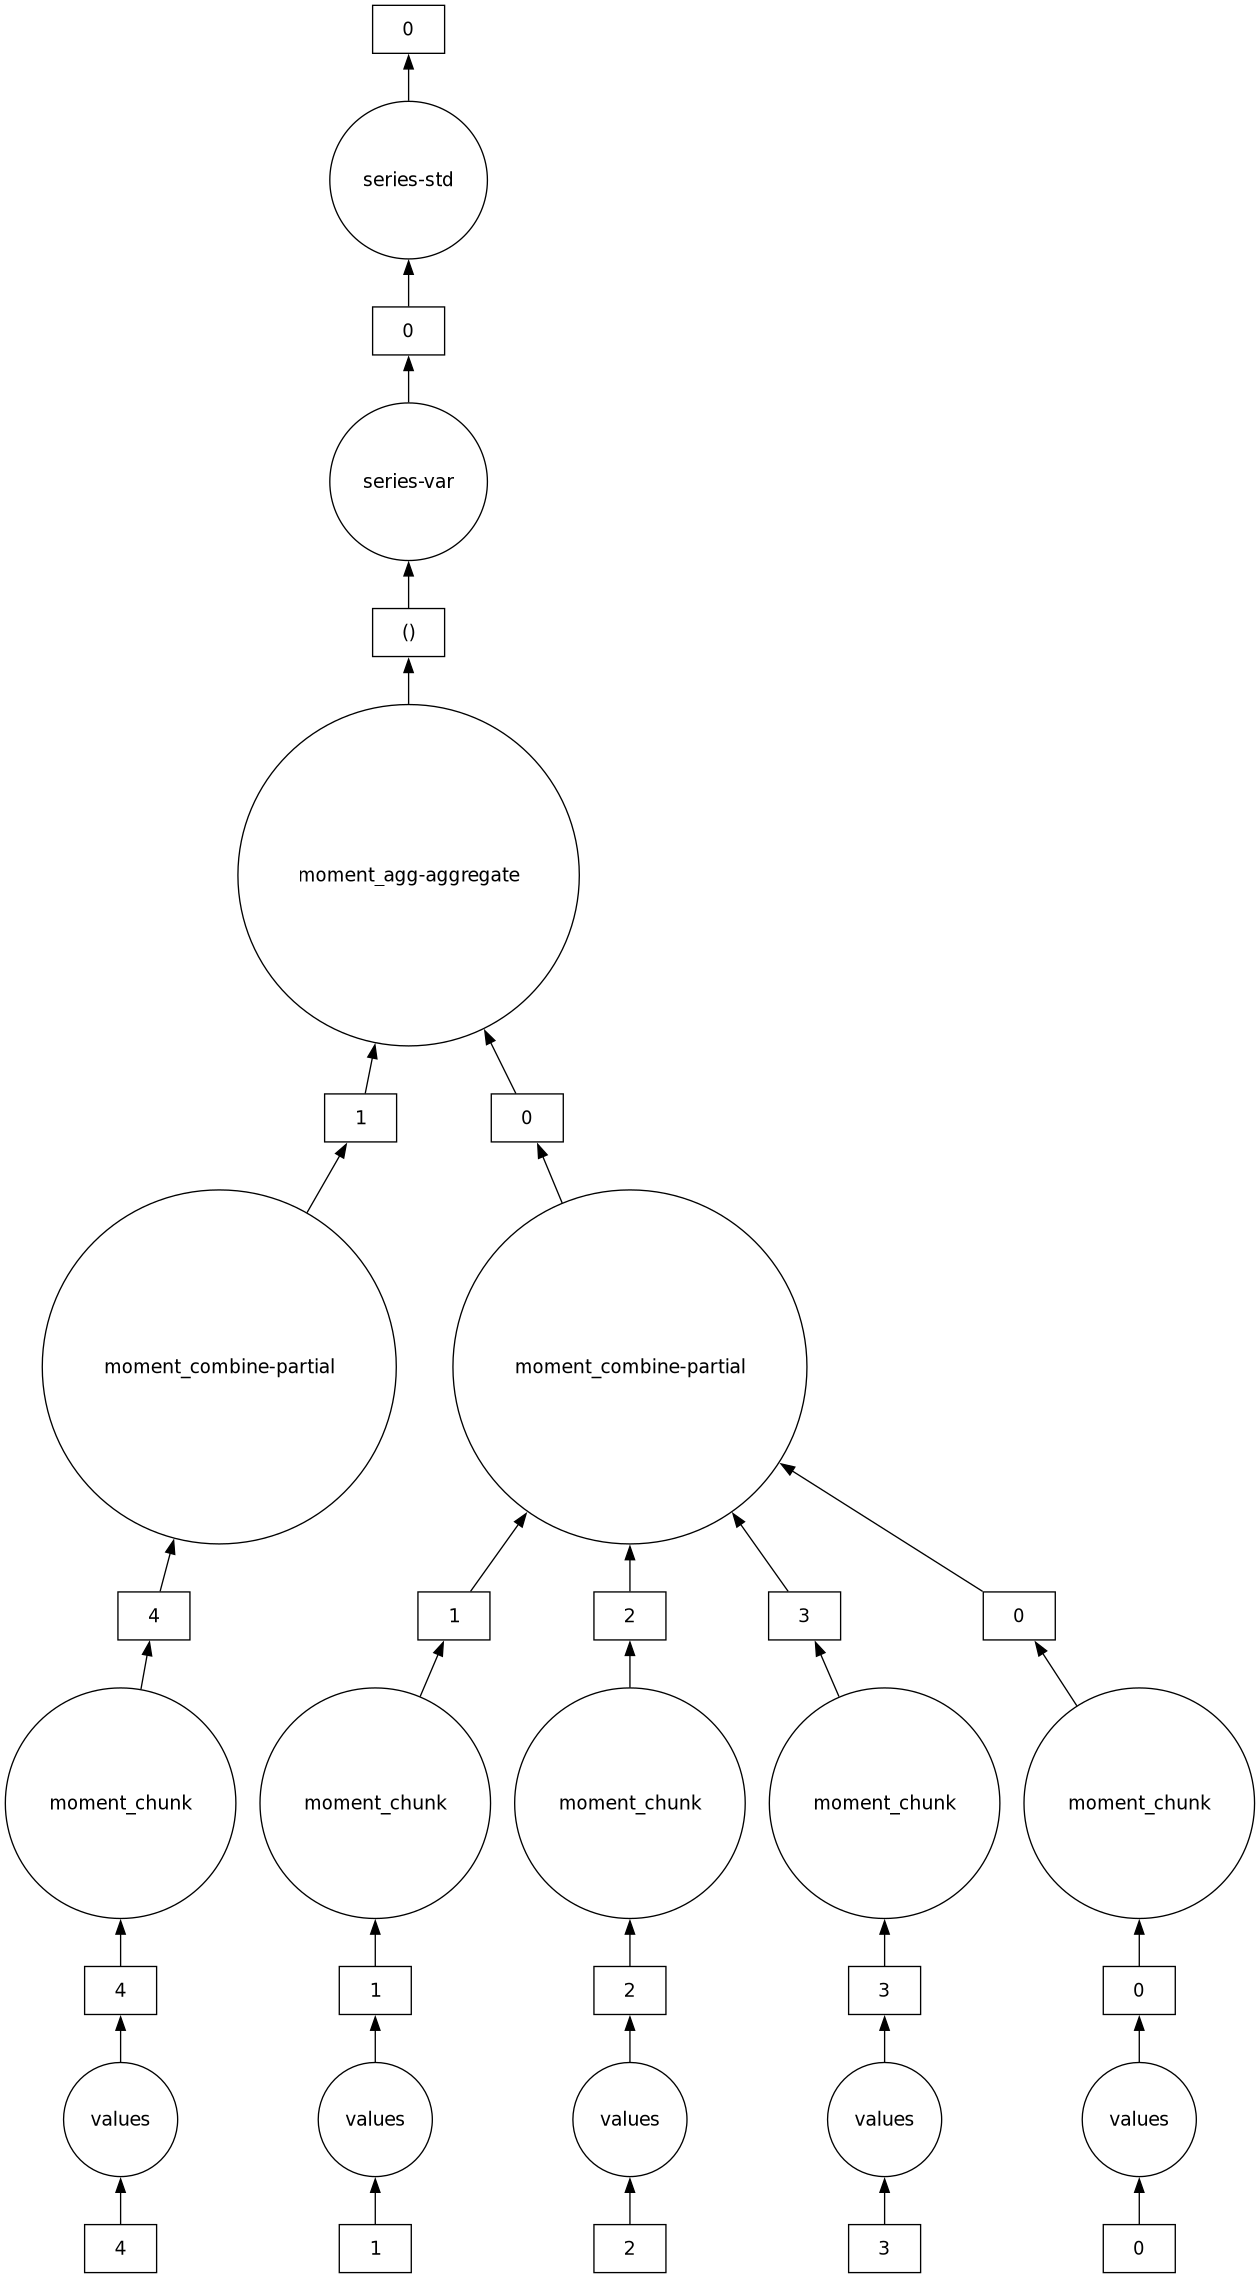

In [47]:
ddf.std().visualize()

In [55]:
with ProgressBar():
    min_max = dd.compute(ddf.min(), ddf.max())

min_max

[########################################] | 100% Completed | 102.92 ms


(-1.9012779495102266, 2.763838383881499)

In [68]:
from time import sleep

def apply_discount(x):
    sleep(1)
    x=x-0.2*x
    return x
    
def get_total(a,b):
    sleep(1)
    return a+b
    
def get_total_price(x,y):
    sleep(1)
    a=apply_discount(x)
    b=apply_discount(y)
    return get_total(a,b)

with ProgressBar():
    x = dask.delayed(apply_discount)(100)
    y = dask.delayed(apply_discount)(200)
    z = dask.delayed(get_total_price)(x,y)
    display(z.compute())

[########################################] | 100% Completed | 5.07 ss


192.0

In [71]:
@dask.delayed
def square(x):
    return x*x

@dask.delayed
def double(x):
    return x*2

@dask.delayed
def add(x, y):
    return x + y
    
output = []
for i in range(10000):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

with ProgressBar():
    display(total.compute())

[########################################] | 100% Completed | 15.71 s


333383325000